In [106]:
import pandas  as pd
import matplotlib.pyplot as plt

# RAW_DF 확인

In [82]:
RAW_DF = pd.read_csv("../../data/netflix-rotten-tomatoes-metacritic-imdb.csv")
RAW_DF.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


In [83]:
RAW_DF.shape

(15480, 29)

In [84]:
RAW_DF.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [85]:
RAW_DF.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

# 장르 데이터 정제

In [86]:
genre_df = RAW_DF[['Title', 'Genre']].copy()
genre_df

,Title,Genre
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance"
1,HOW TO BUILD A GIRL,Comedy
2,Centigrade,"Drama, Thriller"
3,ANNE+,Drama
4,Moxie,"Animation, Short, Drama"
...,...,...
15475,K-POP Extreme Survival,NaN
15476,DreamWorks Shreks Swamp Stories,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family"
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family"


## case 1. 빈데이터는 모두 빈칸으로 처리하고 버리지는 않음

In [87]:
genre_df['Genre'] = genre_df['Genre'].fillna('')
genre_df['Genre_list'] = genre_df['Genre'].apply(lambda x: x.split(', '))

In [88]:
genre_df.head()

,Title,Genre,Genre_list
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[Crime, Drama, Fantasy, Horror, Romance]"
1,HOW TO BUILD A GIRL,Comedy,[Comedy]
2,Centigrade,"Drama, Thriller","[Drama, Thriller]"
3,ANNE+,Drama,[Drama]
4,Moxie,"Animation, Short, Drama","[Animation, Short, Drama]"


* Genre column이 비어있는 데이터를 어떻게 처리하면 좋을지 생각해보기

## case 2. Genre가 빈데이터는 더 이상 보지 않음

In [89]:
genre_df = genre_df.loc[~genre_df['Genre'].isna()]
genre_df['Genre_list'] = genre_df['Genre'].apply(lambda x: x.split(', '))

case 1, 2 중 하나를 택한 후 아래로 진행

# 장르 기준 One-Hot Encoding

In [90]:
unique_genre_list = list()
genre_list = genre_df['Genre_list'].tolist()
genre_list = list(filter(lambda x: x, genre_list))
for genres in genre_list:
    for genre in genres:
        if genre and genre not in unique_genre_list:
            unique_genre_list.append(genre)
unique_genre_list

['Crime',
 'Drama',
 'Fantasy',
 'Horror',
 'Romance',
 'Comedy',
 'Thriller',
 'Animation',
 'Short',
 'Family',
 'Mystery',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Music',
 'Biography',
 'Sport',
 'War',
 'History',
 'Documentary',
 'Film-Noir',
 'Musical',
 'Game-Show',
 'Western',
 'Reality-TV',
 'Talk-Show',
 'News',
 'Adult']

In [91]:
for genre in unique_genre_list:
    genre_df[f'{genre}_Genre'] = genre_df['Genre_list'].apply(lambda x: 1 if genre in x else 0)
genre_df.head()

,Title,Genre,Genre_list,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,...,History_Genre,Documentary_Genre,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[Crime, Drama, Fantasy, Horror, Romance]",1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,Comedy,[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Centigrade,"Drama, Thriller","[Drama, Thriller]",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,ANNE+,Drama,[Drama],0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Moxie,"Animation, Short, Drama","[Animation, Short, Drama]",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
genre_columns = genre_df.columns.tolist()
genre_columns.remove('Genre')
genre_columns.remove('Genre_list')
genre_columns

['Title',
 'Crime_Genre',
 'Drama_Genre',
 'Fantasy_Genre',
 'Horror_Genre',
 'Romance_Genre',
 'Comedy_Genre',
 'Thriller_Genre',
 'Animation_Genre',
 'Short_Genre',
 'Family_Genre',
 'Mystery_Genre',
 'Action_Genre',
 'Adventure_Genre',
 'Sci-Fi_Genre',
 'Music_Genre',
 'Biography_Genre',
 'Sport_Genre',
 'War_Genre',
 'History_Genre',
 'Documentary_Genre',
 'Film-Noir_Genre',
 'Musical_Genre',
 'Game-Show_Genre',
 'Western_Genre',
 'Reality-TV_Genre',
 'Talk-Show_Genre',
 'News_Genre',
 'Adult_Genre']

In [93]:
genre_df = genre_df[genre_columns]
genre_df.head()

,Title,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,Animation_Genre,Short_Genre,...,History_Genre,Documentary_Genre,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre
0,Lets Fight Ghost,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Centigrade,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ANNE+,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Moxie,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
genre_df.sum()

Title                Lets Fight GhostHOW TO BUILD A GIRLCentigradeA...
Crime_Genre                                                       1932
Drama_Genre                                                       6359
Fantasy_Genre                                                     1594
Horror_Genre                                                      1070
Romance_Genre                                                     2445
Comedy_Genre                                                      5077
Thriller_Genre                                                    2739
Animation_Genre                                                   1665
Short_Genre                                                        422
Family_Genre                                                      1433
Mystery_Genre                                                     1190
Action_Genre                                                      2810
Adventure_Genre                                                   1809
Sci-Fi

# genre_df에 date 추가하기

In [95]:
genre_df['Released Date'] = RAW_DF['Netflix Release Date'].copy()
genre_df.head()

,Title,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,Animation_Genre,Short_Genre,...,Documentary_Genre,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre,Released Date
0,Lets Fight Ghost,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-03-04
1,HOW TO BUILD A GIRL,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-03-04
2,Centigrade,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2021-03-04
3,ANNE+,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-03-04
4,Moxie,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2021-03-04


In [102]:
genre_df['Released Date'] = pd.to_datetime(genre_df['Released Date'])

## 연도별로 장르 변화 살피기

In [103]:
genre_df['Year'] = genre_df['Released Date'].dt.year
genre_df.head()

,Title,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,Animation_Genre,Short_Genre,...,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre,Released Date,Year
0,Lets Fight Ghost,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-03-04,2021
1,HOW TO BUILD A GIRL,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2021-03-04,2021
2,Centigrade,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2021-03-04,2021
3,ANNE+,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-03-04,2021
4,Moxie,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2021-03-04,2021


In [112]:
genre_df.groupby('Year').sum()

,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,Animation_Genre,Short_Genre,Family_Genre,...,History_Genre,Documentary_Genre,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre
Year,,,,,,,,,,,,,,,,,,,,,
2015,544,1474,474,277,626,1282,804,430,44,500,...,122,126,0,73,5,35,10,3,7,0
2016,216,616,163,99,220,464,299,181,45,119,...,61,92,0,18,2,11,8,1,3,1
2017,218,708,168,95,248,547,296,232,49,148,...,55,135,0,25,7,7,21,7,0,1
2018,254,839,254,140,330,777,364,238,47,177,...,78,188,0,36,8,13,37,9,4,4
2019,280,1026,230,198,396,854,379,245,85,191,...,97,221,0,24,8,17,40,2,2,5
2020,345,1436,257,231,548,985,504,285,126,266,...,98,226,0,47,20,23,70,3,4,4
2021,75,260,48,30,77,168,93,54,26,32,...,16,42,2,5,2,3,5,1,0,0


In [111]:
genre_df.describe()

,Crime_Genre,Drama_Genre,Fantasy_Genre,Horror_Genre,Romance_Genre,Comedy_Genre,Thriller_Genre,Animation_Genre,Short_Genre,Family_Genre,...,Documentary_Genre,Film-Noir_Genre,Musical_Genre,Game-Show_Genre,Western_Genre,Reality-TV_Genre,Talk-Show_Genre,News_Genre,Adult_Genre,Year
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,...,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.00000,15480.000000,15480.000000,15480.000000
mean,0.124806,0.410788,0.102972,0.069121,0.157946,0.327972,0.176938,0.107558,0.027261,0.092571,...,0.066537,0.000129,0.014729,0.003359,0.007041,0.012339,0.00168,0.001292,0.000969,2017.874806
std,0.330510,0.491993,0.303932,0.253669,0.364702,0.469490,0.381629,0.309832,0.162848,0.289840,...,0.249227,0.011366,0.120469,0.057863,0.083619,0.110395,0.04095,0.035922,0.031115,1.965452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2018.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2020.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2021.000000


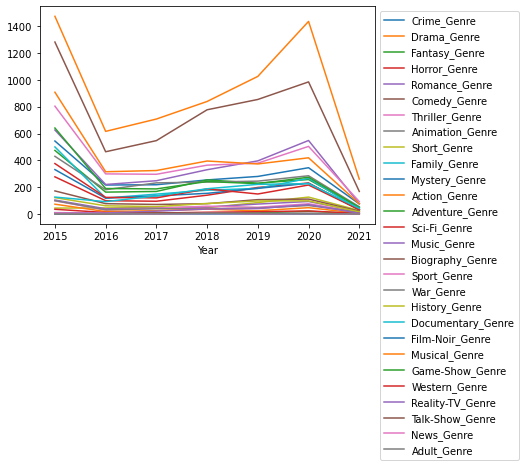

In [113]:
# genre_df.drop(columns='Year').plot.line()
genre_df.groupby('Year').sum().plot.line()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

현재 그래프에서의 문제점

1. 장르 간에 순위 변동이 거의 없다. -> 증가율을 봐야할 듯합니다.

2. 상위 n개만 뽑아서 볼 수 있게 추상화 필요?